# Lab 11 – Mobile Data Analytics

Sorbonne Université</br>
Master in Computer Science </br>
Cellular Networks (MU5IN050)


Datasets of mobile networks are usually the results of calculations applied on Call Detail Records
(CDR) collected by a mobile operator. Data analysis allows mobile operators to have statistics on 
user traffic and network usage. In this lab, you will analyze a sample of the Telecom Italia dataset to 
observe the user activities in the Milan city on December 1, 2013. At the end of the lab, you should 
obtain the statistics on the SMS, call and the Internet activities in the network. 

## Understand the data manually

Download the file `sms-call-internet-mi-2013-12-01.txt` from Nuage. Adjust the following cell to match the location of your file on your computer (the result of evaluation should be `True`).

In [1]:
from pathlib import Path
file = Path(r'../../../Downloads/sms-call-internet-mi-2013-12-01.txt')
file.exists()

True

Answer the following questions without using `pandas` or `numpy`.

### What is the file size (in MB)? 

In [2]:
# Your answer here

### How many columns are there in the file? 

In [4]:
# Your answer here

### How many lines are there in the file? 

In [6]:
# Your answer here

### How many lines having missing data? 

In [8]:
# Your answer here

This file is in Tab-Separated Values (TSV) format with 8 columns corresponding to the following information:
1. **Square id**: the identifier of the square where the data are measured. The Milan city is divided into a 
grid of 100 x 100 squares as illustrated in the following figure:<br>
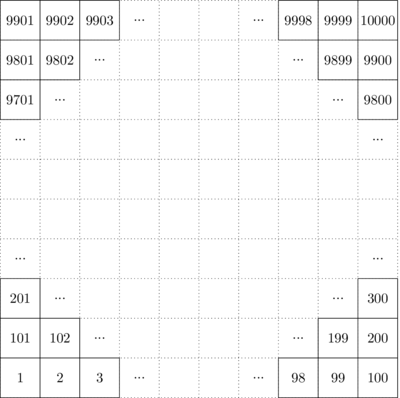
2. **Time interval**: this value indicates the starting time of a 10-minute time interval expressed in the 
number of milliseconds elapsed since 1st January 1970, UTC. The end of the time interval is obtained 
by adding 600 000 milliseconds (10 minutes). That means that the measurements are done every 10 
minutes.
3. **Country code**: the international code of the country related to the measured activity 
4. **SMS-in**: incoming SMS activities in the square during the time interval. The country code indicates 
the country of the SMS sender.
5. **SMS-out**: outgoing SMS activity in the square during the time interval. The country code indicates 
the country of the SMS receive.
6. **Call-in**: incoming call activities in the square during the time interval. The country code indicates the
country of the caller.
7. **Call-out**: outgoing call activities in the square. The country code indicates the country of the callee.
8. **Internet**: Internet activities in the square during the time interval. The country code indicates the 
country of the user.

Still without using `pandas` or `numpy`, answer to the following questions:

### What is the smallest value of square id? What is the highest value? Which values are missing?

In [10]:
# Your answer here

### Convert the time of the lines 0, 1000000, 2000000, 3000000, and 4000000 (index starts from 0) in `datetime` format.

You can use the `fromtimestamp` method.

In [12]:
# Your answer here

### Which country corresponding to the country code 39? And for the following country codes: 46, 226, 41, 33 and 40? 

Your answer here

### Why the values representing the SMS, call and Internet activities are not integers? 

Your answer here

### Which activity does the real value in line 2 correspond to?

In [14]:
# Your answer here

Your answer here

### Evaluate the cell below and comment the results. Do the results match into the to your observation made in questions Q  1.2 and Q 1.3?

In [16]:
import pandas as pd
names = ['sqid', 'time', 'country', 'sms-in', 'sms-out', 'call-in', 'call-out', 'internet']
df = pd.read_csv(file, names=names, sep='\t')
print(df.shape)

(4438331, 8)


Your answer here

## Extract data in columns and lines with Pandas

It is possible to extract part of the data to analyze.

### Run the following cell. What does it do? 

In [17]:
df1 = pd.read_csv(file, names=names, sep='\t', nrows=100)
print(df1.shape)
print(df1.iloc[0])

(100, 8)
sqid        1.000000e+00
time        1.385852e+12
country     3.900000e+01
sms-in      1.109892e-01
sms-out     1.662144e-01
call-in     1.092019e-01
call-out    1.644271e-01
internet    1.364844e+01
Name: 0, dtype: float64


Your answer here

### Run the following cell. What does it do? 

In [18]:
df2 = pd.read_csv(file, names=names, sep='\t', nrows=100, usecols=[3, 4, 5, 6, 7])
print(df2.shape)
print(df2.iloc[0])
print(df2.iloc[1])

(100, 5)
sms-in       0.110989
sms-out      0.166214
call-in      0.109202
call-out     0.164427
internet    13.648438
Name: 0, dtype: float64
sms-in           NaN
sms-out          NaN
call-in          NaN
call-out         NaN
internet    0.026137
Name: 1, dtype: float64


Your answer here

### Does the cell above allows you to answer question Q 1.9?

Your answer here

## Data statistics

Use the commands that you have learned (including the lecture’s slides) to show the following statistics of the 
SMS-in, SMS-out, Call-in, Call-out and Internet activities on 1st December 2013.
- Average value 
- Standard deviation 
- Minimal value 
- Maximal value 
- 25th percentile
- 50th percentile (median)
- 75th percentile

(Help: extract only the necessary columns before analyzing)

In [19]:
# Your answer here

## Temporal traffic profile

Show the traffic profile of the SMS, call and Internet activities of the Milan city on 1st December 2013. For 
each type of traffic (SMS, call and Internet), present the 24-hour traffic profile in the form of bar chart.

Help: 
- Find the 25 timestamp values corresponding to the starting time of each hour of 2013/12/01 (00:00, 01:00, 
02:00, …, 23:00, 00:00 the 12/02)
- Extract data of each activity (SMS-in, SMS-out, Call-in, Call-out, Internet) in each hour.
- The SMS traffic in each hour is the sum of the SMS-in and SMS-out activities during this period.
- The call traffic in each hour is the sum of the Call-in and Call-out activities during this period.
- The Internet traffic in each hour is the sum of all Internet activities during this period.
- For each activity (SMS, call and Internet), store the traffic volumes in a vector of 24 elements which 
represents the traffic volumes of 24 hours of the day.
- With the three vectors that you have, plot three bar charts to present the 24-hour traffic profile of the
SMS, call and Internet activities.

Help++: The following command creates the 25 timestamps

In [22]:
from datetime import datetime, timedelta
midnight = datetime.strptime('2013-12-01', "%Y-%m-%d")
ts = [int( (midnight+timedelta(hours=i)).timestamp()*1000 ) for i in range(25)]

This command creates a dataframe d1 that contains the lines whose time intervals are between 00:00 
and 01:00 of 1st December 2013.

In [23]:
df1 = df[ (df['time']>=ts[0]) & (df['time']<ts[1]) ]

This commands extracts the `sms-in` column between 00:00 and 01:00 of 1st December 2013.

In [24]:
df1si = df1['sms-in']

This command calculates the sum of the ‘sms-in’ activities between 00:00 and 01:00 of 1st December
2013.

In [25]:
df1si.sum(axis=0, skipna=True)

80901.14538571677

In [26]:
# Your answer here

## Exercise 5: Spatial traffic profile (optional)

Show the spatial traffic profile of the SMS, call and Internet activities of the Milan city on 1st December 2013. For 
each type of traffic (SMS, call and Internet), present the traffic profile in the form of a heatmap.
Help: 
- Extract data of each activity (SMS-in, SMS-out, Call-in, Call-out, Internet) in each square id.
- The SMS traffic in each hour is the sum of the SMS-in and SMS-out activities for the square.
- The call traffic in each hour is the sum of the Call-in and Call-out activities for the square.
- The Internet traffic in each hour is the sum of all Internet activities for the square.
- For each activity (SMS, call and Internet), store the traffic volumes in a 100000 elements vector that represents the traffic volumes on all squares.
- Renormalize each vector to that its maximal value is 1.
- Maps each vector to a 100X100 array.
- With the three arrays that you have, plot three maps to present the spatial traffic profile of the
SMS, call and Internet activities. You can use the `imshow` method from `pyplot`

In [29]:
# Your answer here

## Exercice 6 (optional) 

Solve the problem from https://gist.github.com/balouf/ee28114beeb1545aed7b682f0af36bd9

FYI, this is what I asked applicants to solve when I recruited my last developer.

## Exercice 7 (optional) 

Login to Website https://adventofcode.com

Solve the following problems:
- https://adventofcode.com/2022/day/1
- https://adventofcode.com/2022/day/3